<a href="https://colab.research.google.com/github/yuppd28/Mashinne-navchannya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B010%20%D0%9A%D0%BB%D1%8E%D1%88%D0%BD%D1%96%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Клюшніченко


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


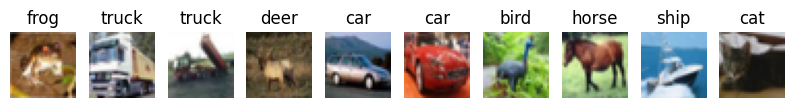

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Виведення перших 10 зображень
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i][0]])
plt.show()

In [3]:
# Нормалізація даних (приведення значень пікселів у діапазон [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

# Перетворення міток у one-hot вектори
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=0.00001)

# Навчання моделі
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.2587 - loss: 1.9754 - val_accuracy: 0.4834 - val_loss: 1.4463 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.4213 - loss: 1.5560 - val_accuracy: 0.5432 - val_loss: 1.3317 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.4765 - loss: 1.4255 - val_accuracy: 0.5715 - val_loss: 1.2011 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.5082 - loss: 1.3484 - val_accuracy: 0.6032 - val_loss: 1.1205 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.5385 - loss: 1.2691 - val_accuracy: 0.6165 - val_loss: 1.0968 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.5619 - loss: 1.2141 - val_accuracy: 0.6377 - val_loss: 1.0357 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5814 - l

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

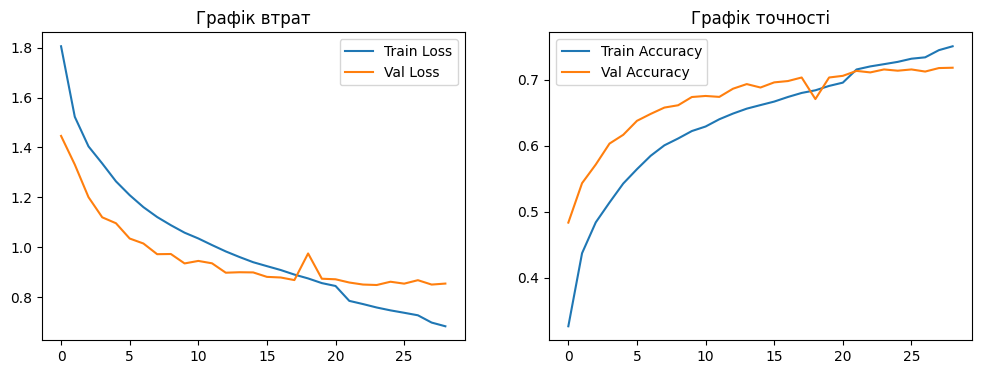

In [7]:
plt.figure(figsize=(12, 4))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Графік втрат')

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Графік точності')

plt.show()

In [8]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

       plane       0.77      0.75      0.76      1000
         car       0.86      0.83      0.84      1000
        bird       0.60      0.57      0.59      1000
         cat       0.51      0.50      0.50      1000
        deer       0.70      0.59      0.64      1000
         dog       0.60      0.69      0.64      1000
        frog       0.75      0.81      0.78      1000
       horse       0.75      0.78      0.76      1000
        ship       0.84      0.82      0.83      1000
       truck       0.78      0.83      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



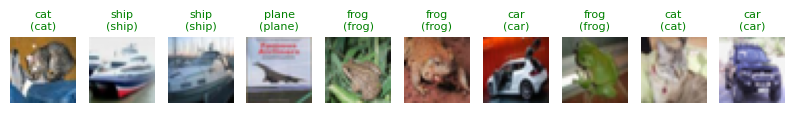

In [9]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    pred_label = class_names[y_pred_classes[i]]
    true_label = class_names[y_true[i]]
    plt.title(f"{pred_label}\n({true_label})", fontsize=8, color='green' if pred_label == true_label else 'red')
plt.show()

Завдання 2

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Перетворення міток у one-hot вектори
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)

# Навчання моделі
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 627s 800ms/step - accuracy: 0.3694 - loss: 1.7773 - val_accuracy: 0.5354 - val_loss: 1.3274 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 677s 793ms/step - accuracy: 0.5211 - loss: 1.3758 - val_accuracy: 0.5624 - val_loss: 1.2481 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 619s 792ms/step - accuracy: 0.5465 - loss: 1.3051 - val_accuracy: 0.5768 - val_loss: 1.2139 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 622s 792ms/step - accuracy: 0.5530 - loss: 1.2744 - val_accuracy: 0.5839 - val_loss: 1.1916 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 622s 792ms/step - accuracy: 0.5677 - loss: 1.2417 - val_accuracy: 0.5837 - val_loss: 1.1836 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 617s 789ms/step - accuracy: 0.5723 - loss: 1.2213 - val_accuracy: 0.5890 - val_loss: 1.1739 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 619s 791ms/step - accura

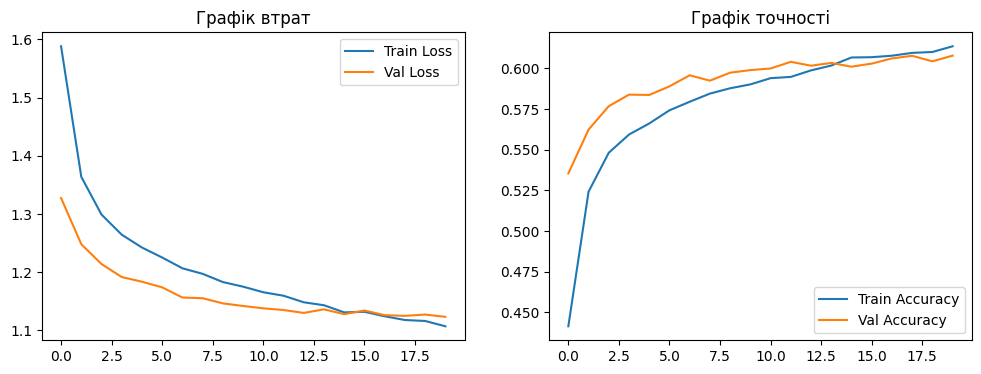

In [16]:
# Графік втрат та точності
plt.figure(figsize=(12, 4))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Графік втрат')

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Графік точності')

plt.show()

In [17]:
# Прогнозування класів для тестового набору
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Виведення класифікаційного звіту
print(classification_report(y_true, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 349ms/step
              precision    recall  f1-score   support

       plane       0.65      0.72      0.68      1000
         car       0.67      0.65      0.66      1000
        bird       0.52      0.51      0.51      1000
         cat       0.48      0.43      0.45      1000
        deer       0.56      0.54      0.55      1000
         dog       0.60      0.49      0.54      1000
        frog       0.65      0.65      0.65      1000
       horse       0.64      0.69      0.66      1000
        ship       0.71      0.74      0.72      1000
       truck       0.59      0.67      0.63      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



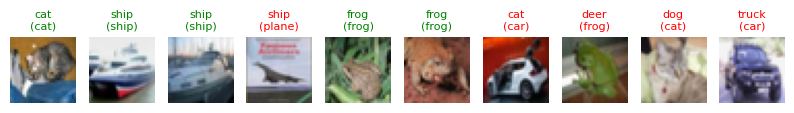

In [18]:
# Візуалізація перших 10 зображень тестового набору з прогнозованими мітками
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    pred_label = class_names[y_pred_classes[i]]
    true_label = class_names[y_true[i]]
    plt.title(f"{pred_label}\n({true_label})", fontsize=8, color='green' if pred_label == true_label else 'red')
plt.show()

У цьому проєкті ми реалізували два підходи до побудови згорткових нейронних мереж для задачі класифікації з використанням датасету CIFAR-10.

Перша модель була побудована "з нуля" з використанням декількох згорткових та повнозв’язних шарів. Ми успішно підібрали гіперпараметри (кількість епох, розмір батчу, архітектуру моделі) та використали колбеки для контролю за процесом навчання. Завдяки цьому вдалося уникнути перенавчання та покращити загальну точність.

Друга модель базувалася на попередньо навченій VGG16, що дозволило використати вже вивчені ознаки з ImageNet. Частина шарів була заморожена, і ми додали нові шари для класифікації даних CIFAR-10. Такий підхід зменшує обчислювальну вартість і прискорює процес навчання, водночас забезпечуючи високу точність.